## Lab 3-3:  Stability classes

In [3]:
# to try this out, let's return to our Gaussian plume model but with different stabilities
# first, load our packages and read in our data.

import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
# In this lab, we will be using if and elif statements to assign variables.
test = 'AA'
if test == 'AA':
    print('This worked')

This worked


In [5]:
# Let's start with the functions and parameters from the Martin 1976 paper
# here, we focus on distances more than 1 km (1000 m) from the source
# for shorter distances, there are different functional forms.
# Note that all of these are for vertical spreading sigma_z -- we will focus
# our analysis along the centerline y (although the paper has values for sigma_y as well)

# specify the range of interest over x (>1000 m only)
x = np.arange(1000,100000,1)

# b is a constant value across stability classes
b = 0.894

# specify the atmospheric class (based on lecture notes and Martin 1976 paper)
airclass = 'A'

if airclass == 'A':
    c = 459.7
    d = 2.094
    f = -9.6
    sig_z = c*np.power(x/1000,d) + f
    a = 213
    sig_y = a*np.power(x/1000,b)
 
elif airclass == 'B':
    c = 108
    d = 1.1
    f = 2.0
    sig_z = c*np.power(x/1000,d) + f
    a = 156
    sig_y = a*np.power(x/1000,b)

elif airclass == 'C':
    c = 61
    d = 0.911
    f = 0
    sig_z = c*np.power(x/1000,d) + f
    a = 104
    sig_y = a*np.power(x/1000,b)

elif airclass == 'D':
    c = 44.5
    d = 0.516
    f = -13
    sig_z = c*np.power(x/1000,d) + f
    a = 68
    sig_y = a*np.power(x/1000,b)

elif airclass == 'E':
    c = 55.4
    d = 0.305
    f = -34
    sig_z = c*np.power(x/1000,d) + f
    a = 50.5
    sig_y = a*np.power(x/1000,b)

elif airclass == 'F':
    c = 62.6
    d = 0.180
    f = -48.6
    sig_z = c*np.power(x/1000,d) + f
    a = 34
    sig_y = a*np.power(x/1000,b)

In [6]:
# print out the value of c to make sure that the program assigned the right one
print(c)

459.7


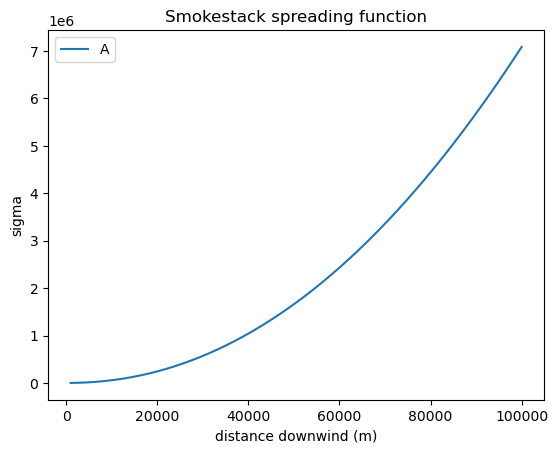

In [7]:

#Let's try plotting how sigma changes with distance downwind, x
plt.figure()
plt.plot(x, sig_z, label=airclass)
plt.ylabel('sigma')
plt.xlabel('distance downwind (m)')
plt.title('Smokestack spreading function')
plt.legend(loc="best")

In [8]:
# Following the lecture notes, we can then plot the ground concentration along the centerline
# where y = 0  and z = 0.  

# if we assume the same plume discharge, height and wind as in lab 3-1, we get:
Q = 8500
# Q is a constant mass flux from the smokestack in kg/s
u = 3.5
# u is a constant wind speed in m/s at the effective stack height h
h = 200
# h is the effective height of the smokestack (actually stack height plus additional
# height the plume rises, in m

C=Q/(np.pi*u*sig_z*sig_y)*np.exp(-(np.power(h,2))/(2*np.power(sig_z,2))) 

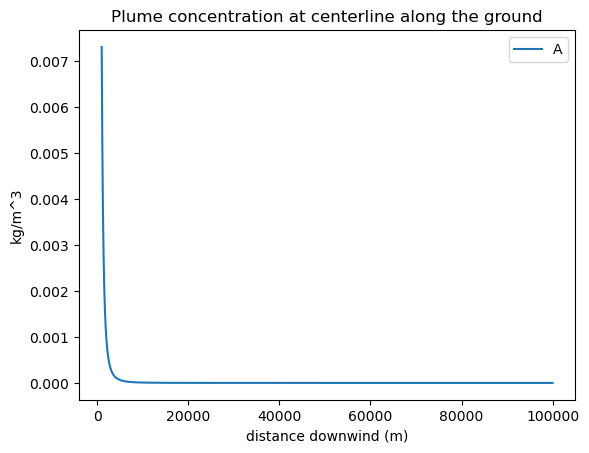

In [9]:
plt.figure()
plt.plot(x, C, label=airclass)
plt.ylabel('kg/m^3')
plt.xlabel('distance downwind (m)')
plt.title('Plume concentration at centerline along the ground')
plt.legend(loc="best")

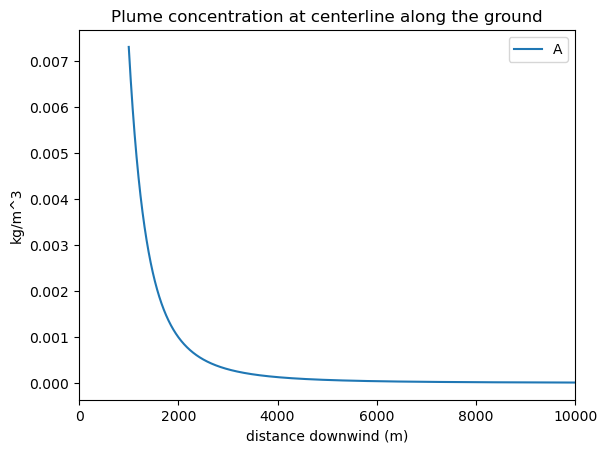

In [10]:
# We can also make a plot where we zoom in closer (as concentration is very negligible far downwind
plt.figure()
plt.plot(x, C, label=airclass)
plt.ylabel('kg/m^3')
plt.xlabel('distance downwind (m)')
plt.xlim(0,10000) 
plt.title('Plume concentration at centerline along the ground')
plt.legend(loc="best")

## Work on your own
Now, try changing the stability class and comparing the plots.  You may want to assign different variable names to the different spreading functions and concentrations so that you can save them all and then plot them all on one graph for comparison.